In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

<IPython.core.display.Javascript object>


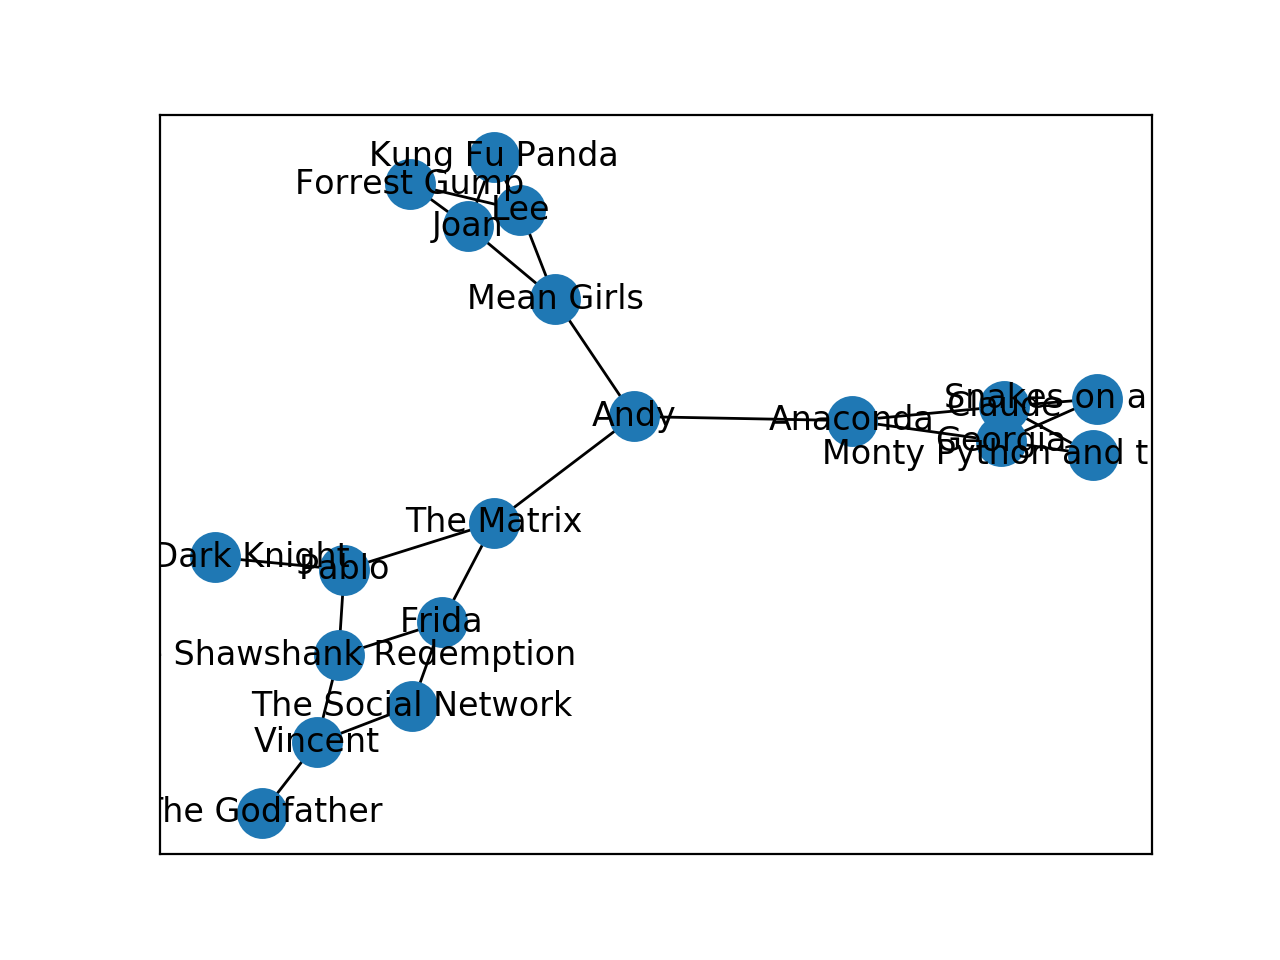

In [8]:
def answer_one():
        
    # Your Code Here
    G4 = nx.read_edgelist('Employee_Movie_Choices.txt', delimiter = '\t', nodetype = str)
    
    return G4

answer_one()
plot_graph(answer_one())


### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [16]:
def answer_two():
    
    # Your Code Here
    G = answer_one()
    
    for node in G.nodes():
        #print(node)
        if node in employees:
            G.add_node(node, type='employee')
        elif node in movies:
            G.add_node(node, type='movie')
    return G
answer_two()

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


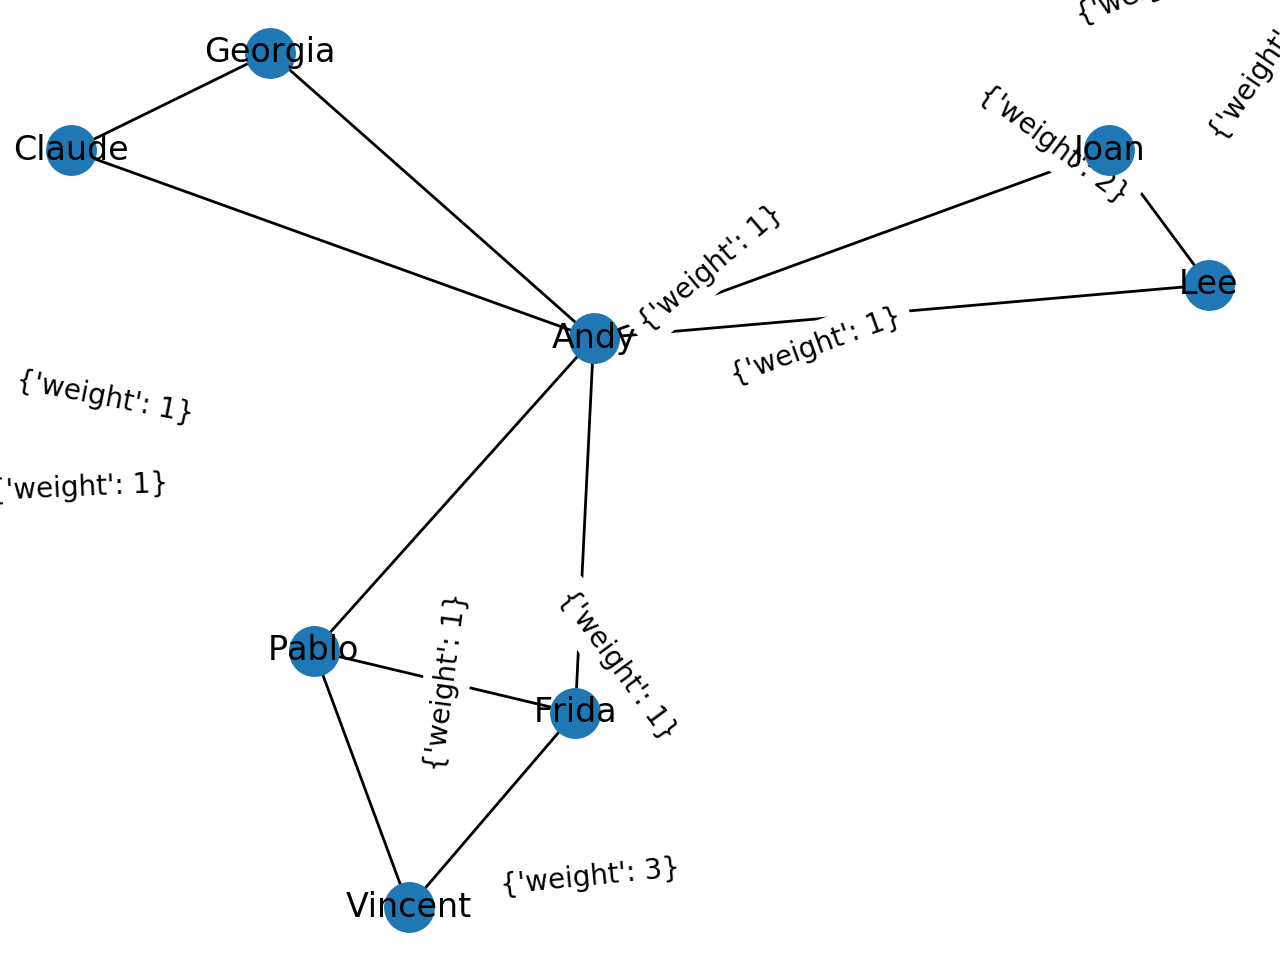

{('Claude',
  'Andy'): Text(-0.1288256721547541, -0.5501503523038823, "{'weight': 1}"),
 ('Claude',
  'Georgia'): Text(0.022335865660551985, -0.9398441856345328, "{'weight': 3}"),
 ('Joan',
  'Andy'): Text(-0.516507633685312, -0.16270467766154928, "{'weight': 1}"),
 ('Joan',
  'Lee'): Text(-0.904797604936165, -0.018788857763410494, "{'weight': 3}"),
 ('Frida',
  'Andy'): Text(0.1495029585273761, 0.2755884273427258, "{'weight': 1}"),
 ('Frida',
  'Vincent'): Text(0.6226862313473751, 0.8388436352075425, "{'weight': 2}"),
 ('Frida',
  'Pablo'): Text(0.5094069671777872, 0.52188825126276, "{'weight': 2}"),
 ('Pablo',
  'Andy'): Text(0.2597755079282378, 0.1197894081904008, "{'weight': 1}"),
 ('Pablo',
  'Vincent'): Text(0.7329587807482368, 0.6830446160552175, "{'weight': 1}"),
 ('Andy',
  'Lee'): Text(-0.4884184719730263, 0.01740540416850546, "{'weight': 1}"),
 ('Andy',
  'Georgia'): Text(0.05103303709313271, -0.5162042490602838, "{'weight': 1}")}

In [21]:
def answer_three():
        
    # Your Code Here
    
    return bipartite.weighted_projected_graph(answer_two(), employees)

nx.draw(answer_three(),pos = nx.spring_layout(answer_three()), with_labels=True)
nx.draw_networkx_edge_labels(answer_three(),pos = nx.spring_layout(answer_three()))

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [78]:
def answer_four():
        
    # Your Code Here
    R_df = pd.read_csv('Employee_Relationships.txt', delim_whitespace=True, names=['from','to','weight'])
    E_df = pd.DataFrame(answer_three().edges(data=True), columns=['from','to','weight'])
    df = pd.merge(R_df, E_df, how='left', right_on=['from', 'to'], left_on=['from', 'to'])

    df['weight_y'] = df['weight_y'].map(lambda x: x['weight'] if type(x)==dict else None)
    df['weight_y'].fillna(value=0,inplace=True)

    corr = df['weight_x'].corr(df['weight_y'])
    
    return corr
answer_four()

0.7923292254169957